In [1]:
import numpy as np
import math
import tensorflow as tf
import makro_utils as mku
import os 
from tensorflow.python.framework import ops
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
ops.reset_default_graph() 

start_neurons = 5
lts_size = 20
input_layer = tf.placeholder(tf.float32, (None,28,28,1))
conv1 = tf.layers.Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer)
conv1 = tf.layers.Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
pool1 = tf.layers.MaxPooling2D((2, 2), (2,2))(conv1)
pool1 = tf.layers.Dropout(0.25)(pool1)

conv2 = tf.layers.Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
print(conv2.shape)
conv2 = tf.layers.Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(conv2)
print(conv2.shape)
pool2 = tf.layers.MaxPooling2D((2, 2), (2,2))(conv2)
pool2 = tf.layers.Dropout(0.5)(pool2)

conv3 = tf.layers.Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)
conv3 = tf.layers.Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(conv3)
pool3 = tf.layers.MaxPooling2D((2, 2), (2,2))(conv3)
pool3 = tf.layers.Dropout(0.5)(pool3)

conv4 = tf.layers.Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool3)
conv4 = tf.layers.Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(conv4)
pool4 = tf.layers.MaxPooling2D((2, 2), (2,2))(conv4)
pool4 = tf.layers.Dropout(0.5)(pool4)

# Middle
convm = tf.layers.Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(pool4)
convm = tf.layers.Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(convm)
#Flatten
flatten = tf.layers.flatten(convm)
# Add variation
mu = tf.layers.Dense(units = lts_size, activation = 'sigmoid', name = 'mu')(flatten)
sigma = tf.layers.Dense(units = lts_size, activation = 'sigmoid', name = 'sigma')(flatten)

z = mu + sigma*tf.random.normal(tf.shape(mu), 0, 1, dtype = tf.float32)

out = tf.layers.Dense(units = flatten.get_shape().as_list()[1], activation = 'relu', name = 'mtp_out')(z)

reshape = tf.reshape(out, tf.shape(convm))

unpool4 = tf.image.resize_images(reshape, tf.constant([conv4.shape[1], conv4.shape[2]], tf.int32))
uconv4 = tf.layers.Conv2D(start_neurons * 8, (3,3), activation = "relu", padding = "same")(unpool4)
uconv4 = tf.layers.Conv2D(start_neurons * 8, (3,3), activation = "relu", padding = "same")(uconv4)

unpool3 = tf.image.resize_images(uconv4, tf.constant([conv3.shape[1], conv3.shape[2]], tf.int32))
uconv3 = tf.layers.Conv2D(start_neurons * 4, (3,3), activation = "relu", padding = "same")(unpool3)
uconv3 = tf.layers.Conv2D(start_neurons * 4, (3,3), activation = "relu", padding = "same")(uconv3)

unpool2 = tf.image.resize_images(uconv3, tf.constant([conv2.shape[1], conv2.shape[2]], tf.int32))
uconv2 = tf.layers.Conv2D(start_neurons * 2, (3,3), activation = "relu", padding = "same")(unpool2)
uconv2 = tf.layers.Conv2D(start_neurons * 2, (3,3), activation = "relu", padding = "same")(uconv2)

unpool1 = tf.image.resize_images(uconv2, tf.constant([conv1.shape[1], conv1.shape[2]], tf.int32))
uconv1 = tf.layers.Conv2D(start_neurons * 1, (3,3), activation = "relu", padding = "same")(unpool1)
uconv1 = tf.layers.Conv2D(1, (3,3), activation = None, padding = "same")(uconv1)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
(?, 14, 14, 10)
(?, 14, 14, 10)


Instructions for updating:
Use keras.layers.flatten instead.


In [5]:

print("input layer: ", input_layer.shape)
print("conv1: ", conv1.shape)
print("pool1: ", pool1.shape)
print("conv2: ", conv2.shape)
print("pool2: ", pool2.shape)
print("conv3: ", conv3.shape)
print("pool3: ", pool3.shape)
print("conv4: ", conv4.shape)
print("pool4: ", pool4.shape)
print("convm: ", convm.shape)
print("flatten: ", flatten.shape)
print("mu, sigma: ", mu.shape, sigma.shape )
print("z:", z.shape)
print("out: ", out.shape)
print("reshape: ",  reshape.shape)
print("unpool4: ", unpool4.shape)
print("uconv4:  ",   uconv4.shape)
print("unpool3: ", unpool3.shape)
print("uconv3:  ",   uconv3.shape)
print("unpool2: ", unpool2.shape)
print("uconv2:  ",   uconv2.shape)
print("unpool1: ", unpool1.shape)
print("uconv1:  ",   uconv1.shape)

input layer:  (?, 28, 28, 1)
conv1:  (?, 28, 28, 5)
pool1:  (?, 14, 14, 5)
conv2:  (?, 14, 14, 10)
pool2:  (?, 7, 7, 10)
conv3:  (?, 7, 7, 20)
pool3:  (?, 3, 3, 20)
conv4:  (?, 3, 3, 40)
pool4:  (?, 1, 1, 40)
convm:  (?, 1, 1, 80)
flatten:  (?, 80)
mu, sigma:  (?, 20) (?, 20)
z: (?, 20)
out:  (?, 80)
reshape:  (?, 1, 1, 80)
unpool4:  (?, 3, 3, 80)
uconv4:   (?, 3, 3, 40)
unpool3:  (?, 7, 7, 40)
uconv3:   (?, 7, 7, 20)
unpool2:  (?, 14, 14, 20)
uconv2:   (?, 14, 14, 10)
unpool1:  (?, 28, 28, 10)
uconv1:   (?, 28, 28, 1)


In [6]:
#Config
epoch_number = 40
minibatch_size = 512
learning_rate = 0.001
print_cost = True


Starting epoch:  0
Epoch_cost: 0.07056583578769979
Epoch_rl cost: 0.06517761
Epoch_KL cost: 0.49558607


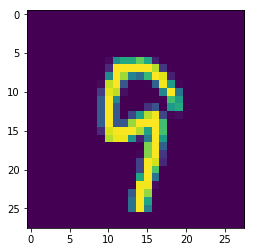

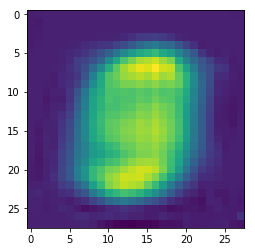


Starting epoch:  1
Minibatch index: 118
Starting epoch:  2
Epoch_cost: 0.05821929983476289
Epoch_rl cost: 0.053964205
Epoch_KL cost: 1.3931267


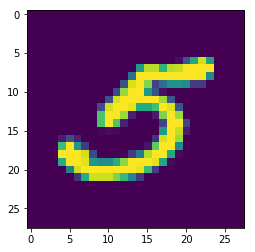

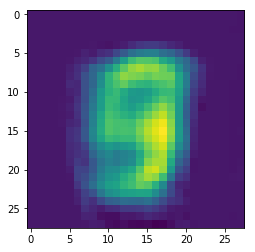


Starting epoch:  3
Minibatch index: 118
Starting epoch:  4
Epoch_cost: 0.04894397277225796
Epoch_rl cost: 0.047347832
Epoch_KL cost: 2.0126166


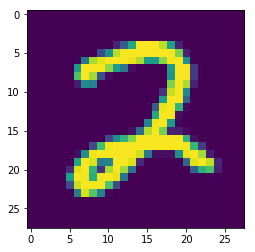

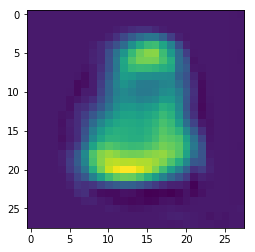


Starting epoch:  5
Minibatch index: 118
Starting epoch:  6
Epoch_cost: 0.04396419593284273
Epoch_rl cost: 0.04105915
Epoch_KL cost: 2.0047514


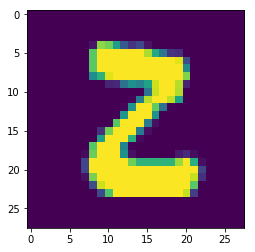

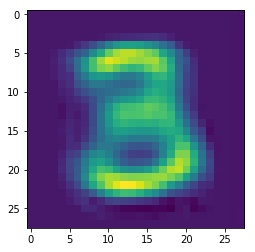


Starting epoch:  7
Minibatch index: 118
Starting epoch:  8
Epoch_cost: 0.03990956666505235
Epoch_rl cost: 0.038976714
Epoch_KL cost: 2.1620016


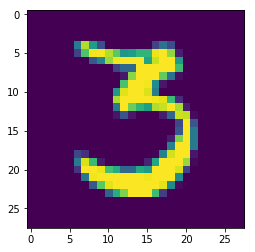

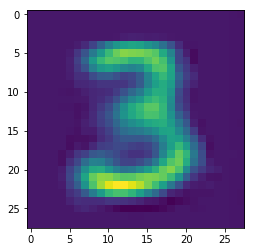


Starting epoch:  9
Minibatch index: 118
Starting epoch:  10
Epoch_cost: 0.03735673793742799
Epoch_rl cost: 0.034291923
Epoch_KL cost: 2.148297


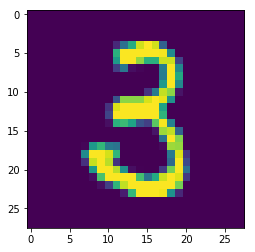

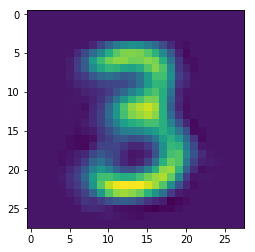


Starting epoch:  11
Minibatch index: 118
Starting epoch:  12
Epoch_cost: 0.03561014032516725
Epoch_rl cost: 0.033619568
Epoch_KL cost: 2.1385987


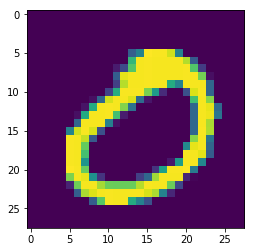

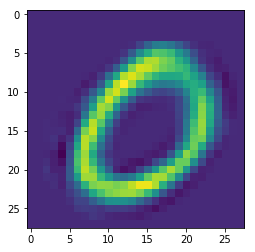


Starting epoch:  13
Minibatch index: 118
Starting epoch:  14
Epoch_cost: 0.03378872133982486
Epoch_rl cost: 0.032184187
Epoch_KL cost: 2.0931706


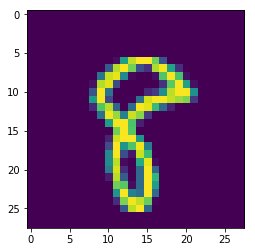

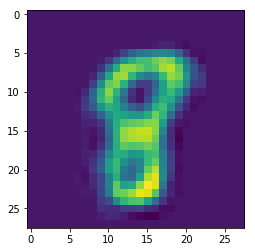


Starting epoch:  15
Minibatch index: 118
Starting epoch:  16
Epoch_cost: 0.03223919215747434
Epoch_rl cost: 0.026816223
Epoch_KL cost: 2.114494


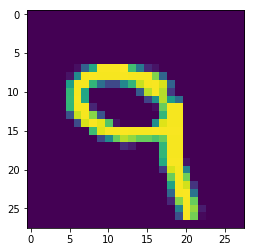

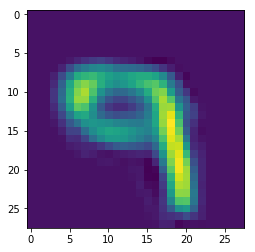


Starting epoch:  17
Minibatch index: 118
Starting epoch:  18
Epoch_cost: 0.03140112332617625
Epoch_rl cost: 0.028547093
Epoch_KL cost: 2.0430725


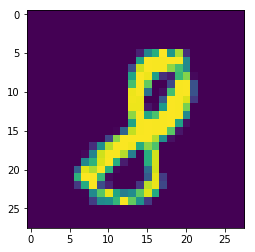

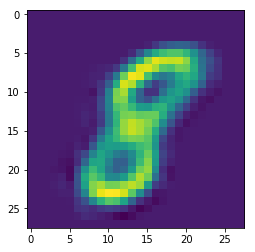


Starting epoch:  19
Minibatch index: 118
Starting epoch:  20
Epoch_cost: 0.03031432531519322
Epoch_rl cost: 0.02827846
Epoch_KL cost: 1.9757298


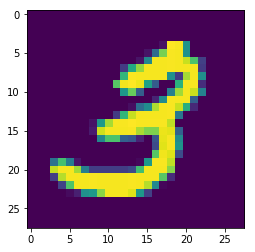

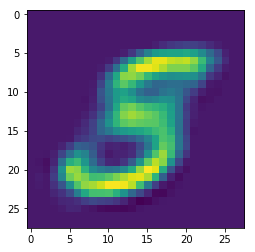


Starting epoch:  21
Minibatch index: 118
Starting epoch:  22
Epoch_cost: 0.029716108392319106
Epoch_rl cost: 0.027583078
Epoch_KL cost: 1.9818101


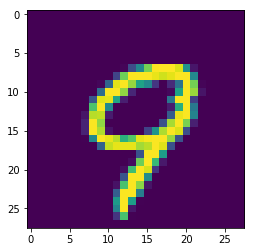

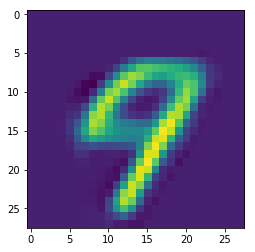


Starting epoch:  23
Minibatch index: 118
Starting epoch:  24
Epoch_cost: 0.028791079663822803
Epoch_rl cost: 0.026339596
Epoch_KL cost: 2.0115848


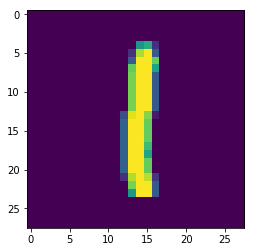

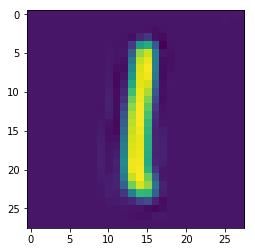


Starting epoch:  25
Minibatch index: 118
Starting epoch:  26
Epoch_cost: 0.02813360878290274
Epoch_rl cost: 0.025545465
Epoch_KL cost: 1.9758523


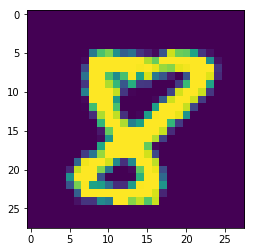

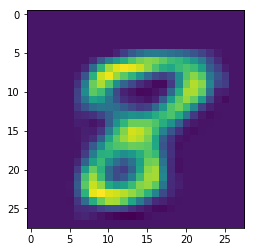


Starting epoch:  27
Minibatch index: 118
Starting epoch:  28
Epoch_cost: 0.0275391628090133
Epoch_rl cost: 0.024519539
Epoch_KL cost: 1.9401774


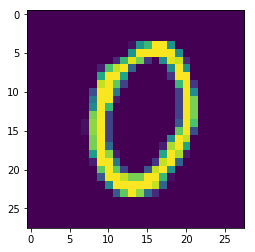

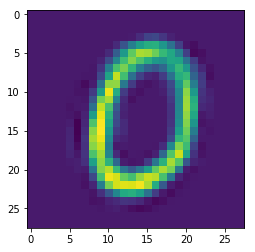


Starting epoch:  29
Minibatch index: 118
Starting epoch:  30
Epoch_cost: 0.026975715469218734
Epoch_rl cost: 0.025807511
Epoch_KL cost: 1.9302951


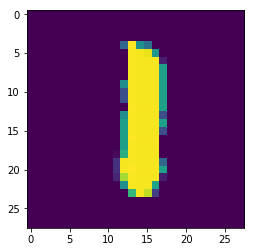

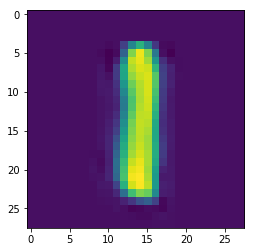


Starting epoch:  31
Minibatch index: 118
Starting epoch:  32
Epoch_cost: 0.026550963425483444
Epoch_rl cost: 0.023872709
Epoch_KL cost: 1.9467226


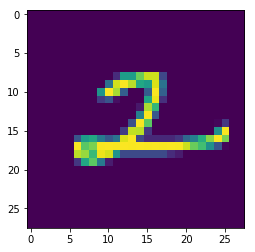

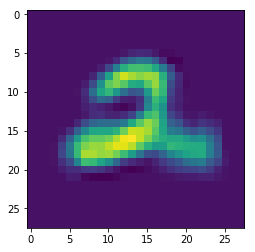


Starting epoch:  33
Minibatch index: 118
Starting epoch:  34
Epoch_cost: 0.026104023361690012
Epoch_rl cost: 0.023931887
Epoch_KL cost: 1.9292058


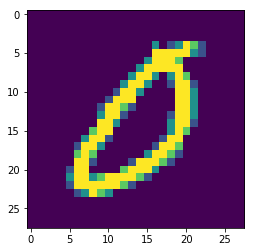

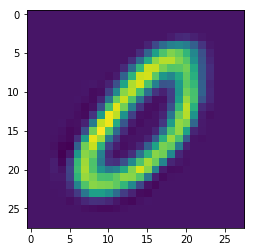


Starting epoch:  35
Minibatch index: 118
Starting epoch:  36
Epoch_cost: 0.025575285236168133
Epoch_rl cost: 0.022803472
Epoch_KL cost: 1.9432659


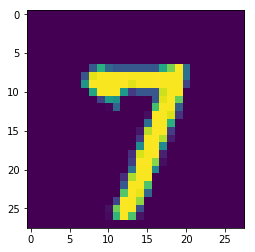

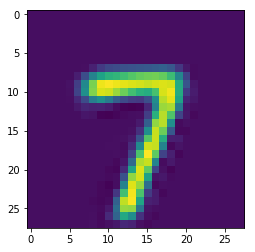


Starting epoch:  37
Minibatch index: 118
Starting epoch:  38
Epoch_cost: 0.02518864374002841
Epoch_rl cost: 0.022954902
Epoch_KL cost: 1.9163033


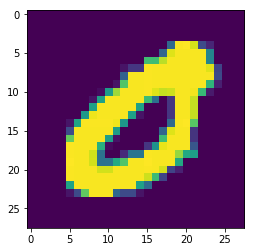

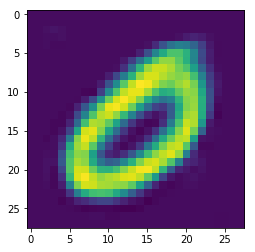


Starting epoch:  39


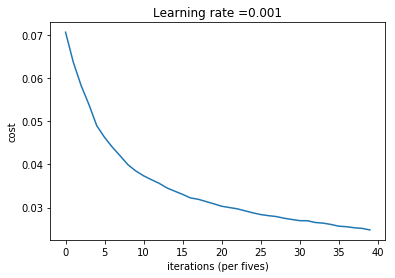

In [7]:


      
m = x_train.shape[0]  
costs = [] 
x_train = x_train/255
x_train = np.expand_dims(x_train, axis=3)
#Define loss function
generated_image = uconv1
reconstruction_loss = tf.reduce_mean(tf.square(input_layer - generated_image))
KL_divergence =  0.5*tf.reduce_mean(tf.square(mu) + tf.square(sigma) - tf.log(1e-8 + tf.square(sigma)) - 1)   # Kullback–Leibler divergence
loss = reconstruction_loss + 0.001*KL_divergence
    
#Initialize parameters and define optimizer
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(loss)
np.random.shuffle(x_train)

with tf.Session() as sess:
        
    #Initialize variables
    sess.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
        
    #Training loop
    for epoch in range(epoch_number):
        print("\nStarting epoch: ", epoch)
            
            
            
        epoch_cost = 0.          
        num_minibatches = int(m / minibatch_size) 
       
        minibatches = mku.mini_batches_x_only(x_train, minibatch_size)
       
        i = 0
        for minibatch in minibatches:
            
            i = 1 + i
            
            print("Minibatch index:", i, end = "\r", flush = True)
          
            _, minibatch_cost, KL, rl = sess.run([optimizer, loss, KL_divergence, reconstruction_loss], feed_dict = {input_layer: minibatch})
            
            
            epoch_cost = epoch_cost + minibatch_cost / num_minibatches
                
        np.random.shuffle(x_train)    
              
                    
        if print_cost == True:
            costs.append(epoch_cost)
        if epoch % 2 == 0:
            print("Epoch_cost:", epoch_cost)
            print("Epoch_rl cost:", rl / num_minibatches)
            print("Epoch_KL cost:", KL / num_minibatches)
            a, b = sess.run([input_layer, generated_image], feed_dict = {input_layer : x_train[0:1]})   
            plt.imshow(a[0,:,:,0])
            plt.show()
            plt.imshow(b[0,:,:,0])
            plt.show()
                
                
                
    saver.save(sess, 'model/vae/vae-unet')        
    #Plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per fives)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
